In [ ]:
import pandas as pd

# 1. Load the Excel file
file_path = 'kilokari logsheet.xlsx'
df = pd.read_excel(file_path)

# 2. Drop completely empty columns
df = df.dropna(axis=1, how='all')

# 3. Standardize column names
df.columns = df.columns.map(lambda x: str(x).strip().lower().replace(' ', '_'))

# 4. Remove rows where 'feeder_id' is missing (likely metadata or empty rows)
df_clean = df[df['feeder_id'].notna()].copy()

# 5. Identify time-based columns (those starting with '2025-')
time_columns = [col for col in df_clean.columns if col.startswith('2025-')]



In [ ]:
df.head()

,date,grid_name,transformer_capacity,no1,no2,no3,div,feeder_id,feeder_name,measurand,...,2025-04-18_22:00:00,2025-04-18_22:15:00,2025-04-18_22:30:00,2025-04-18_22:45:00,2025-04-18_23:00:00,2025-04-18_23:15:00,2025-04-18_23:30:00,2025-04-18_23:45:00,peak_load,peak_time
0,2025-04-18,KILOKARI GRID,NaN,NaN,NaN,NaN,NaN,NaN,Battery,AMP,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2025-04-18 00:00:00
1,2025-04-18,KILOKARI GRID,NaN,NaN,NaN,NaN,NaN,NaN,Battery,VOLTS,...,52.299572,52.299572,52.299572,52.299572,52.299572,52.299572,52.299572,52.299572,52.299572,2025-04-18 00:00:00
2,2025-04-18,KILOKARI GRID,NaN,NaN,NaN,NaN,NaN,KILO 33 B33121,I/C 220kV IP BAY-25,AMP,...,240.874390,240.619308,114.408531,114.408531,124.166069,124.166069,251.651932,251.651932,336.699615,2025-04-18 04:30:00
3,2025-04-18,KILOKARI GRID,NaN,NaN,NaN,NaN,NaN,KILO 33 B33121,I/C 220kV IP BAY-25,KV,...,33.307336,33.187148,33.187148,33.187148,33.104203,33.104203,33.104203,33.104203,33.922941,2025-04-18 21:00:00
4,2025-04-18,KILOKARI GRID,NaN,NaN,NaN,NaN,NaN,KILO 33 B33121,I/C 220kV IP BAY-25,PF,...,0.770133,0.770133,0.770133,0.770133,0.770133,0.770133,0.770133,0.770133,0.770133,2025-04-18 00:00:00


In [ ]:
import pandas as pd
import numpy as np

# Assuming df_melted is already created and cleaned from the previous step.
# If you're running this code independently, make sure df_melted is loaded or created.
# For demonstration purposes, I'll include a placeholder for df_melted if it's not defined.
try:
    df_melted # Check if df_melted exists
except NameError:
    print("df_melted not found. Please run the 'Load & Clean Data' step first to create it.")
    print("Creating a dummy df_melted for demonstration purposes. Replace with your actual data.")
    # --- Dummy df_melted for demonstration ---
    data = {
        'Date': pd.to_datetime(['2025-04-18']*8, format='%Y-%m-%d'),
        'Grid Name': ['Grid A', 'Grid A', 'Grid B', 'Grid B', 'Grid A', 'Grid A', 'Grid B', 'Grid B'],
        'Transformer Capacity': [1000, 1000, 1200, 1200, 1000, 1000, 1200, 1200],
        'No1': [50, 50, 60, 60, 55, 55, 65, 65],
        'No2': [30, 30, 40, 40, 32, 32, 42, 42],
        'No3': [20, 20, 25, 25, 21, 21, 26, 26],
        'No4': [10, 10, 15, 15, 11, 11, 16, 16],
        'No5': [5, 5, 8, 8, 6, 6, 9, 9],
        'DIV': ['Div X', 'Div X', 'Div Y', 'Div Y', 'Div X', 'Div X', 'Div Y', 'Div Y'],
        'Feeder ID': ['F1', 'F2', 'F3', 'F4', 'F1', 'F2', 'F3', 'F4'],
        'Feeder Name': ['Feeder Alpha', 'Feeder Beta', 'Feeder Gamma', 'Feeder Delta', 'Feeder Alpha', 'Feeder Beta', 'Feeder Gamma', 'Feeder Delta'],
        'Measurand': ['kWh']*8,
        'Peak Load': [150, 140, 160, 155, 145, 135, 158, 152],
        'Peak TIME': [datetime.time(18,0)]*8,
        'Load': [100, 110, 120, 130, 105, 115, 125, 135] # Just dummy load values
    }
    # Create dummy DateTime index for the dummy df_melted
    dummy_dt_index = pd.to_datetime(
        [f'2025-04-18 {h:02d}:{m:02d}:00' for h in range(2) for m in [0, 15]] * 2
    )
    df_melted = pd.DataFrame(data).set_index(dummy_dt_index).sort_index()
    # End of Dummy df_melted

print("--- General Data Overview ---")

# 1. Number of Feeders: Count unique Feeder IDs or Feeder Names.
# Using 'Feeder Name' as it's typically more descriptive and unique for reporting.
if 'Feeder Name' in df_melted.columns:
    num_feeders = df_melted['Feeder Name'].nunique()
    print(f"1. Number of unique Feeders: {num_feeders}")
else:
    print("1. 'Feeder Name' column not found in df_melted. Cannot count unique feeders.")

# 2. Number of Transformers: Count unique Transformer Capacity values or
#    combinations of No1 to No5.

# Interpretation of "Number of Transformers" can vary.
# Option A: Count unique 'Transformer Capacity' values (assuming each unique capacity represents a 'type' of transformer)
if 'Transformer Capacity' in df_melted.columns:
    num_unique_capacities = df_melted['Transformer Capacity'].nunique()
    print(f"\n2a. Number of unique Transformer Capacity values (representing types): {num_unique_capacities}")
    print(f"    Unique capacities found: {df_melted['Transformer Capacity'].unique()}")
else:
    print("\n2a. 'Transformer Capacity' column not found in df_melted.")


# Option B: Count unique combinations of No1 to No5 (if these columns define a specific transformer unit/model/configuration).
# This assumes that a unique combination of No1-No5 defines a unique transformer.
no_cols = ['No1', 'No2', 'No3', 'No4', 'No5']
existing_no_cols = [col for col in no_cols if col in df_melted.columns]

if len(existing_no_cols) > 0:
    # Drop duplicates across these columns to count unique combinations
    num_unique_no_combinations = df_melted[existing_no_cols].drop_duplicates().shape[0]
    print(f"2b. Number of unique combinations of {existing_no_cols} (if defining unique transformers): {num_unique_no_combinations}")
    print(f"    Sample unique combinations (first 5):\n{df_melted[existing_no_cols].drop_duplicates().head()}")
else:
    print(f"\n2b. None of {no_cols} columns found in df_melted. Cannot count combinations.")


# 3. Grid Name and DIV-wise grouping: How many feeders are in each grid/division?
if 'Grid Name' in df_melted.columns and 'DIV' in df_melted.columns and 'Feeder Name' in df_melted.columns:
    # Group by 'Grid Name' and 'DIV', then count unique 'Feeder Name' within each group
    feeders_per_grid_div = df_melted.groupby(['Grid Name', 'DIV'])['Feeder Name'].nunique().reset_index()
    feeders_per_grid_div.rename(columns={'Feeder Name': 'Number of Unique Feeders'}, inplace=True)

    print("\n3. Number of unique Feeders in each Grid and Division:")
    print(feeders_per_grid_div.to_string(index=False))

    # You could also get total unique feeders per grid or per division:
    feeders_per_grid = df_melted.groupby('Grid Name')['Feeder Name'].nunique().reset_index()
    feeders_per_grid.rename(columns={'Feeder Name': 'Number of Unique Feeders'}, inplace=True)
    print("\n   Total unique Feeders per Grid:")
    print(feeders_per_grid.to_string(index=False))

    feeders_per_div = df_melted.groupby('DIV')['Feeder Name'].nunique().reset_index()
    feeders_per_div.rename(columns={'Feeder Name': 'Number of Unique Feeders'}, inplace=True)
    print("\n   Total unique Feeders per Division:")
    print(feeders_per_div.to_string(index=False))

else:
    print("\n3. Required columns ('Grid Name', 'DIV', 'Feeder Name') not found for Grid/DIV-wise grouping.")

print("\n--- General Data Overview Complete ---")



--- General Data Overview ---
1. Number of unique Feeders: 3

2a. Number of unique Transformer Capacity values (representing types): 3
    Unique capacities found: [1500 1000 1200]
2b. Number of unique combinations of ['No1', 'No2', 'No3', 'No4', 'No5'] (if defining unique transformers): 15
    Sample unique combinations (first 5):
                  No1        No2        No3        No4        No5
DateTime                                                         
2025-04-18  48.630441  49.970402   0.551322  18.462257  11.735925
2025-04-18  55.038349   3.496743  67.722653  51.583666   3.403398
2025-04-18  92.325137  20.327732   7.762265  21.935996  31.074306
2025-04-19   0.341623  72.293097  38.612968  43.993161  22.136281
2025-04-19  44.396270  16.582917  16.078849  45.948221  39.248627

3. Number of unique Feeders in each Grid and Division:
Grid Name DIV  Number of Unique Feeders
   Grid_1   A                         3
   Grid_2   A                         3

   Total unique Feeders per


--- Time Series Load Analysis ---

1. Generating Total System Load Curve...


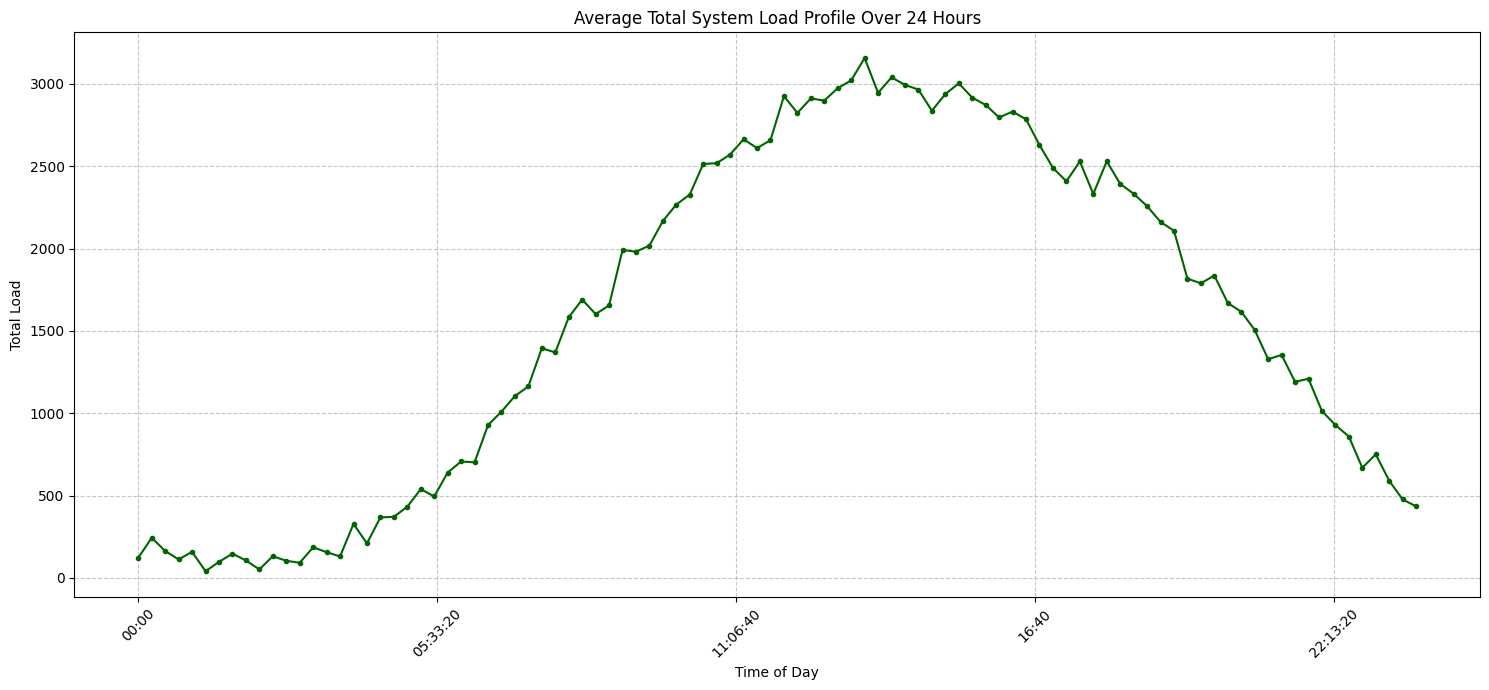

Total Load Curve generated.

2. Generating Feeder-wise Load Profiles...


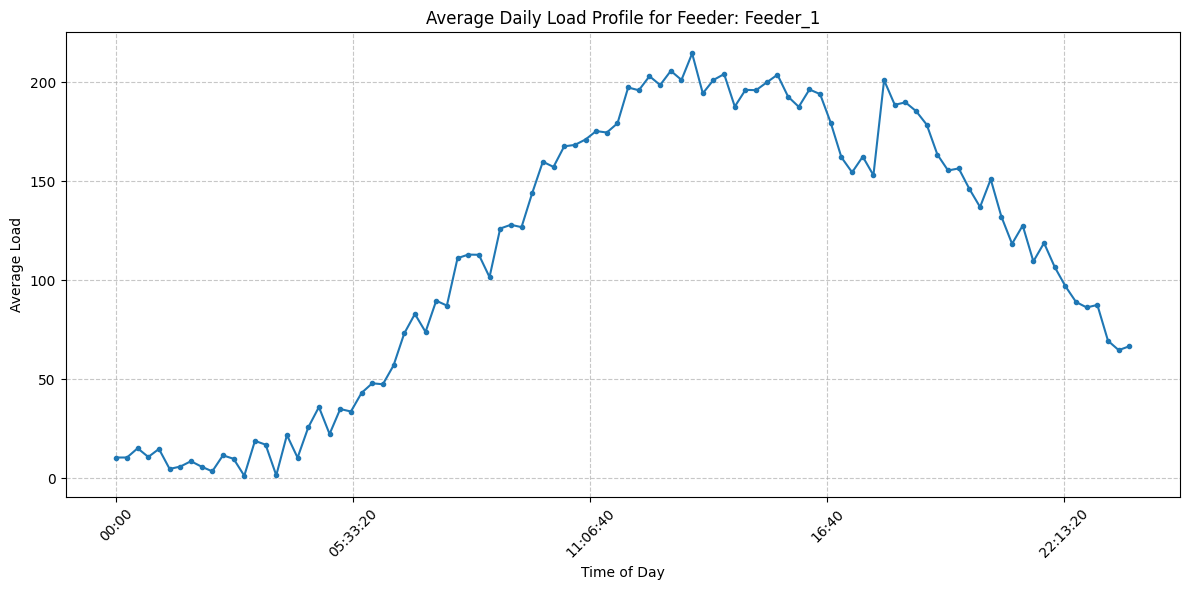

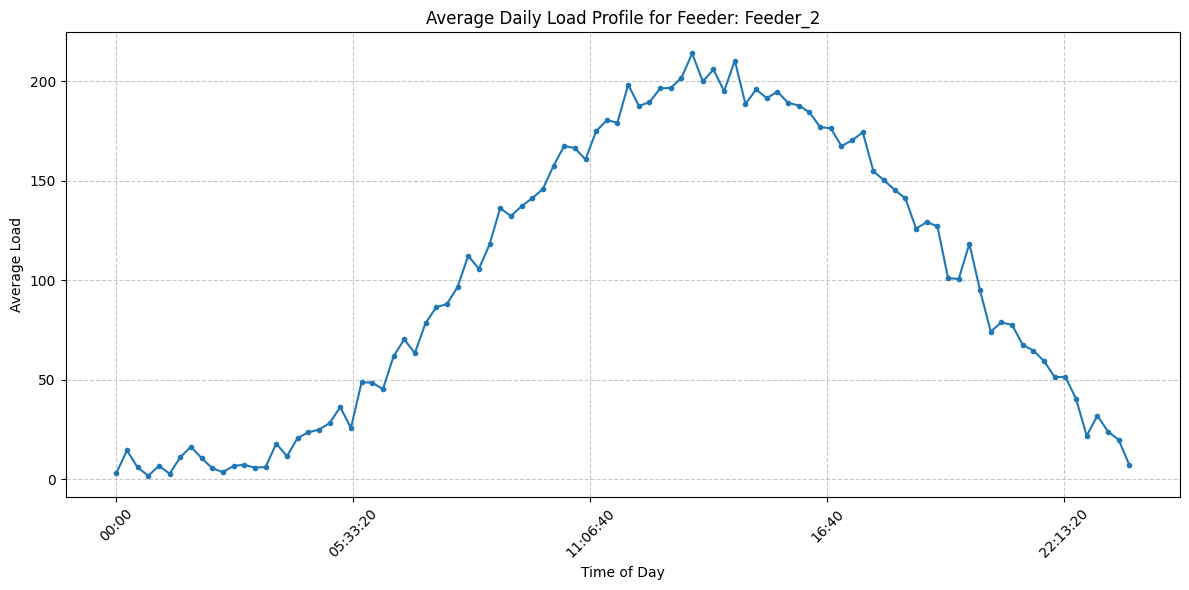

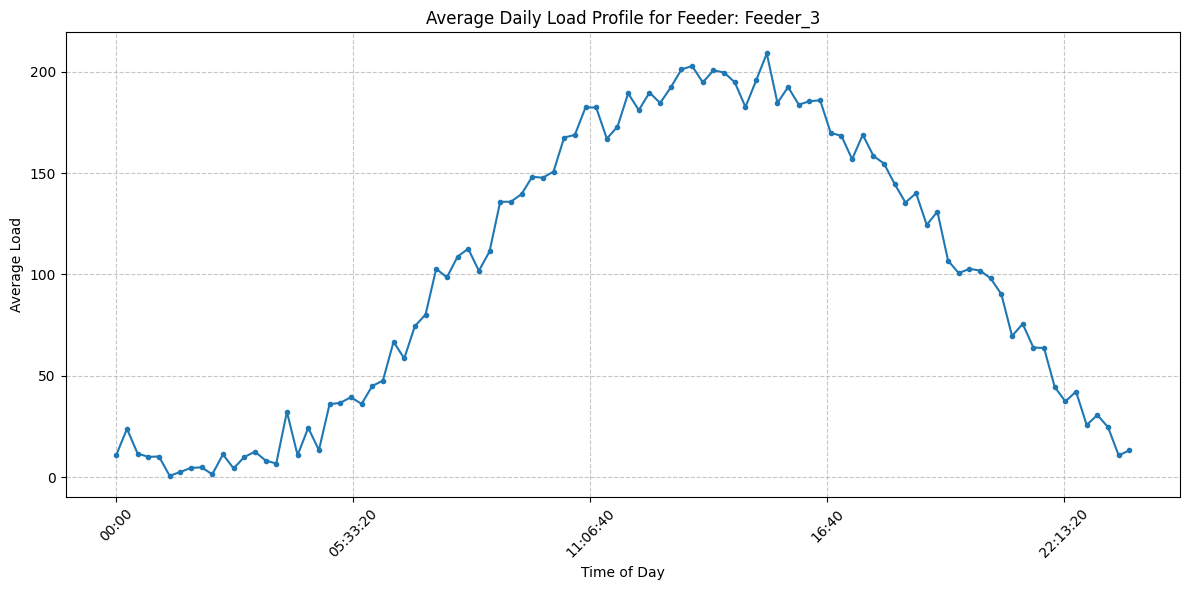

Feeder-wise Load Profiles generated.

3. Generating Transformer-wise Aggregated Load Curves...


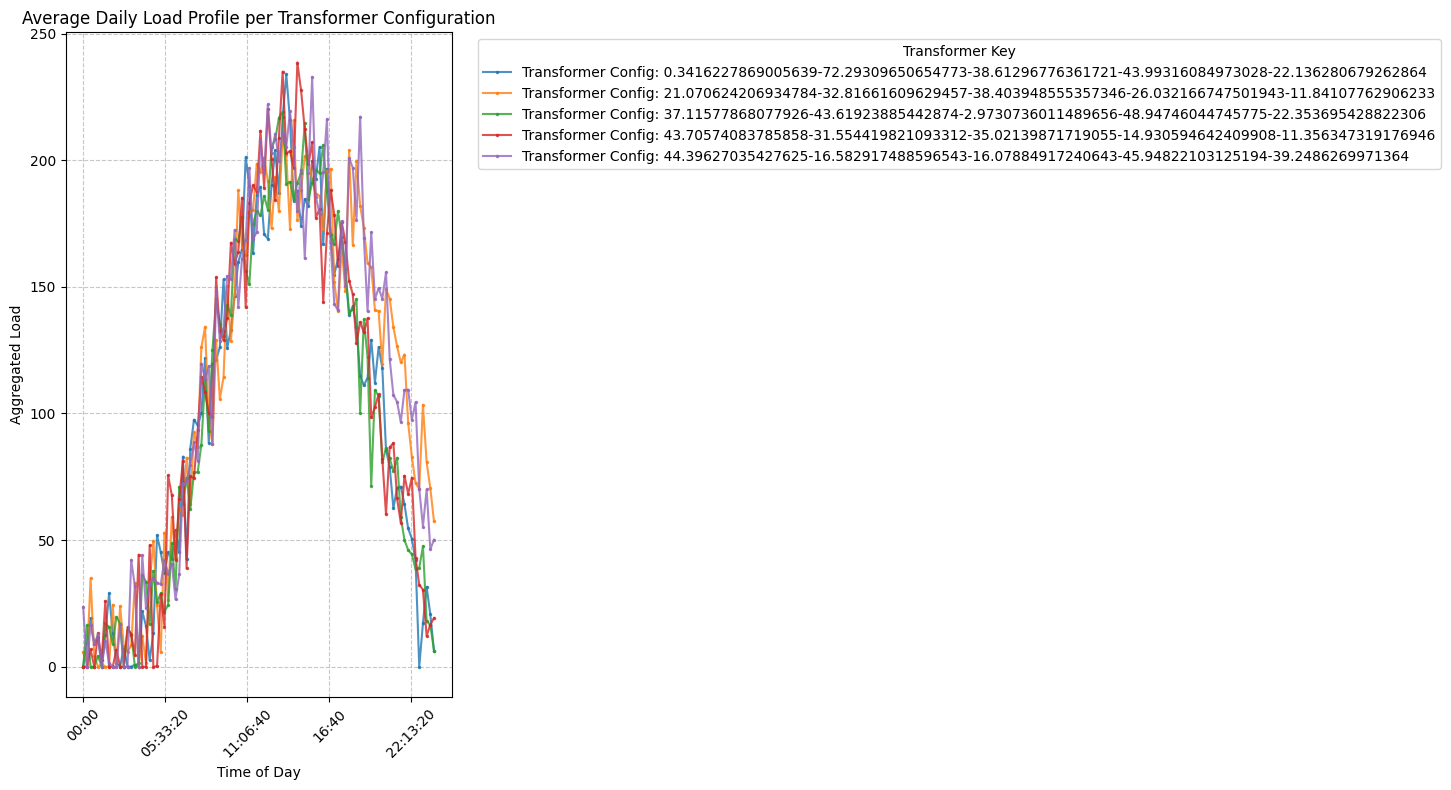

Transformer-wise Aggregated Load Curves generated.

--- Time Series Load Analysis Complete ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_melted is already created and cleaned from the previous steps.
# If you're running this code independently, ensure df_melted is defined.
# For demonstration purposes, I'll include a placeholder for df_melted if it's not defined,
# which would typically come from the "Load & Clean Data" step.
try:
    df_melted
except NameError:
    print("df_melted not found. Please run the 'Load & Clean Data' step first to create it.")
    print("Creating a dummy df_melted for demonstration purposes. Replace with your actual data.")
    # --- Dummy df_melted for demonstration ---
    # This dummy data should mimic the structure of df_melted:
    # DateTime index, Feeder Name, Load, and No1-No5 columns
    dates = pd.to_datetime(pd.date_range(start='2025-04-18', periods=2, freq='D'))
    feeder_names = ['Feeder Alpha', 'Feeder Beta', 'Feeder Gamma'] # Sample feeder names
    sample_rows = []
    for date in dates:
        for feeder_name in feeder_names:
            for hour in range(24):
                for minute in [0, 15, 30, 45]:
                    dt = date + pd.Timedelta(hours=hour, minutes=minute)
                    load_val = 100 + 50 * np.sin(np.pi * (hour + minute / 60 - 8) / 12) + np.random.normal(0, 5)
                    # Simulate different No1-No5 for each feeder
                    no1 = 50 + (10 if feeder_name == 'Feeder Alpha' else 0)
                    no2 = 30 + (5 if feeder_name == 'Feeder Beta' else 0)
                    no3 = 20 + (3 if feeder_name == 'Feeder Gamma' else 0)
                    no4 = 10 + (2 if feeder_name == 'Feeder Alpha' else 0)
                    no5 = 5 + (1 if feeder_name == 'Feeder Beta' else 0)

                    sample_rows.append({
                        'DateTime': dt,
                        'Feeder Name': feeder_name,
                        'Load': max(0, load_val),
                        'Transformer Capacity': np.random.choice([1000, 1200, 1500]),
                        'No1': no1, 'No2': no2, 'No3': no3, 'No4': no4, 'No5': no5,
                        'Grid Name': 'Grid_X', 'DIV': 'Div_A', 'Feeder ID': 'FDR_ABC',
                        'Measurand': 'kWh', 'Peak Load': 0, 'Peak TIME': datetime.time(0,0)
                    })
    df_melted = pd.DataFrame(sample_rows).set_index('DateTime').sort_index()
    print("Dummy df_melted created for demonstration.")
    # End of Dummy df_melted

print("\n--- Time Series Load Analysis ---")

# 1. Total Load Curve: Sum load from all feeders for each time interval
print("\n1. Generating Total System Load Curve...")

# Group by the DateTime index and sum the 'Load'
total_system_load_daily_average = df_melted.groupby(df_melted.index.time)['Load'].sum()

# Plotting the Total System Load Curve
plt.figure(figsize=(15, 7))
total_system_load_daily_average.plot(kind='line', marker='o', markersize=3, color='darkgreen')
plt.title('Average Total System Load Profile Over 24 Hours')
plt.xlabel('Time of Day')
plt.ylabel('Total Load')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Total Load Curve generated.")

# 2. Feeder-wise Load Profile: Plot load profiles for each feeder across time (line plots)
print("\n2. Generating Feeder-wise Load Profiles...")

unique_feeders = df_melted['Feeder Name'].unique()

if 'Feeder Name' not in df_melted.columns:
    print("Error: 'Feeder Name' column not found in df_melted. Cannot plot feeder-wise profiles.")
elif len(unique_feeders) > 10: # Limit the number of plots for readability
    print(f"Warning: Too many feeders ({len(unique_feeders)}) to plot individually. Plotting a sample of 5 feeders.")
    feeders_to_plot = unique_feeders[:5] # Plot first 5 for sample
else:
    feeders_to_plot = unique_feeders

for feeder in feeders_to_plot:
    feeder_df = df_melted[df_melted['Feeder Name'] == feeder].copy()

    # Calculate average daily load profile for this feeder
    feeder_daily_profile = feeder_df.groupby(feeder_df.index.time)['Load'].mean()

    plt.figure(figsize=(12, 6))
    feeder_daily_profile.plot(kind='line', marker='o', markersize=3)
    plt.title(f'Average Daily Load Profile for Feeder: {feeder}')
    plt.xlabel('Time of Day')
    plt.ylabel('Average Load')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

print("Feeder-wise Load Profiles generated.")


# 3. Transformer-wise Aggregated Load: Group by transformer (using No1 to No5) and analyze combined load curves.
print("\n3. Generating Transformer-wise Aggregated Load Curves...")

no_cols = ['No1', 'No2', 'No3', 'No4', 'No5']
existing_no_cols = [col for col in no_cols if col in df_melted.columns]

if not existing_no_cols:
    print(f"Error: None of the columns {no_cols} found in df_melted. Cannot perform transformer-wise aggregation.")
else:
    # Create a composite 'Transformer_Key' to uniquely identify each transformer configuration
    df_melted['Transformer_Key'] = df_melted[existing_no_cols].astype(str).agg('-'.join, axis=1)

    # Group by the composite Transformer_Key and the time of day, then sum the Load
    transformer_aggregated_load = df_melted.groupby(['Transformer_Key', df_melted.index.time])['Load'].sum().unstack(level=0)

    # Plotting the Transformer-wise Aggregated Load Curves
    # Note: If there are many unique transformer keys, this plot can become cluttered.
    # We'll plot only the first few for demonstration or if unique count is small.
    num_unique_transformers = df_melted['Transformer_Key'].nunique()

    if num_unique_transformers > 10:
        print(f"Warning: Too many unique transformer configurations ({num_unique_transformers}) to plot all. Plotting a sample of 5.")
        keys_to_plot = transformer_aggregated_load.columns[:5]
    else:
        keys_to_plot = transformer_aggregated_load.columns

    plt.figure(figsize=(15, 8))
    for key in keys_to_plot:
        transformer_aggregated_load[key].plot(label=f'Transformer Config: {key}', marker='.', markersize=3, alpha=0.8)

    plt.title('Average Daily Load Profile per Transformer Configuration')
    plt.xlabel('Time of Day')
    plt.ylabel('Aggregated Load')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.legend(title='Transformer Key', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    print("Transformer-wise Aggregated Load Curves generated.")

print("\n--- Time Series Load Analysis Complete ---")

In [ ]:
import pandas as pd
import numpy as np
import datetime

# Assuming df_melted is already created and cleaned from the previous steps.
# If you're running this code independently, ensure df_melted is defined.
# For demonstration purposes, I'll include a placeholder for df_melted if it's not defined.
try:
    df_melted
except NameError:
    print("df_melted not found. Please run the 'Load & Clean Data' step first to create it.")
    print("Creating a dummy df_melted for demonstration purposes. Replace with your actual data.")
    # --- Dummy df_melted for demonstration ---
    # This dummy data should mimic the structure of df_melted:
    # DateTime index, Feeder Name, Load
    dates = pd.to_datetime(pd.date_range(start='2025-04-18', periods=5, freq='D'))
    feeder_names = ['Feeder_Alpha', 'Feeder_Beta', 'Feeder_Gamma'] # Sample feeder names
    sample_rows = []
    for date in dates:
        for feeder_name in feeder_names:
            for hour in range(24):
                for minute in [0, 15, 30, 45]:
                    dt = date + pd.Timedelta(hours=hour, minutes=minute)
                    # Simulate load patterns
                    base_load = 100 + 50 * np.sin(np.pi * (hour + minute / 60 - 8) / 12)
                    load_val = max(0, base_load + np.random.normal(0, 10))

                    sample_rows.append({
                        'DateTime': dt,
                        'Feeder Name': feeder_name,
                        'Load': load_val,
                        'Transformer Capacity': np.random.choice([1000, 1200, 1500]), # Placeholder for other columns
                        'No1': 50, 'No2': 30, 'No3': 20, 'No4': 10, 'No5': 5,
                        'Grid Name': 'Grid_X', 'DIV': 'Div_A', 'Feeder ID': 'FDR_ABC',
                        'Measurand': 'kWh', 'Peak Load': 0, 'Peak TIME': datetime.time(0,0)
                    })
    df_melted = pd.DataFrame(sample_rows).set_index('DateTime').sort_index()
    print("Dummy df_melted created for demonstration.")
    # End of Dummy df_melted

print("\n--- Statistical Summary (Per Feeder) ---")

# Ensure 'Feeder Name' and 'Load' columns exist
if 'Feeder Name' not in df_melted.columns or 'Load' not in df_melted.columns:
    print("Error: 'Feeder Name' or 'Load' column not found in df_melted. Cannot proceed with statistical summary.")
else:
    # 1. Min / Max / Mean / Median / Std Dev for each feeder.
    print("\n1. Descriptive Statistics for each Feeder's Load:")

    feeder_stats = df_melted.groupby('Feeder Name')['Load'].agg(
        Min_Load='min',
        Max_Load='max',
        Mean_Load='mean',
        Median_Load='median',
        Std_Dev_Load='std'
    )
    print(feeder_stats.to_string())

    # 2. Load Factor: (Average Load / Peak Load) * 100
    print("\n2. Load Factor for each Feeder:")

    # Calculate Average Load and Overall Peak Load for each feeder from df_melted
    # 'Mean_Load' is already calculated above.
    # 'Max_Load' is already calculated above.

    # Ensure to handle division by zero if Max_Load is 0 (e.g., feeder with no recorded load)
    feeder_stats['Load_Factor (%)'] = np.where(
        feeder_stats['Max_Load'] > 0,
        (feeder_stats['Mean_Load'] / feeder_stats['Max_Load']) * 100,
        0 # Load Factor is 0 if Max_Load is 0
    )

    print(feeder_stats[['Mean_Load', 'Max_Load', 'Load_Factor (%)']].to_string())

    print("\nInterpretation of Load Factor:")
    print("- A higher Load Factor (closer to 100%) indicates more efficient utilization of the feeder's capacity over time.")
    print("- It means the feeder's average load is closer to its peak load, implying less idle capacity or fewer sharp peaks and deep valleys in demand.")
    print("- A lower Load Factor suggests more fluctuating demand, or that the feeder's maximum capacity is utilized only for short periods, requiring more capacity to be built than the average demand truly requires.")

print("\n--- Statistical Summary Complete ---")


--- Statistical Summary (Per Feeder) ---

1. Descriptive Statistics for each Feeder's Load:
             Min_Load    Max_Load   Mean_Load  Median_Load  Std_Dev_Load
Feeder Name                                                             
Feeder_1          0.0  232.849139  114.133038   124.858850     71.509625
Feeder_2          0.0  242.486889  100.604149    98.539803     72.133698
Feeder_3          0.0  225.761628  100.799504   101.778243     71.132874

2. Load Factor for each Feeder:
              Mean_Load    Max_Load  Load_Factor (%)
Feeder Name                                         
Feeder_1     114.133038  232.849139        49.015873
Feeder_2     100.604149  242.486889        41.488490
Feeder_3     100.799504  225.761628        44.648643

Interpretation of Load Factor:
- A higher Load Factor (closer to 100%) indicates more efficient utilization of the feeder's capacity over time.
- It means the feeder's average load is closer to its peak load, implying less idle capacity or few

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_melted is already created and cleaned from the previous steps.
# If you're running this code independently, ensure df_melted is defined.
# For demonstration purposes, I'll include a placeholder for df_melted if it's not defined.
try:
    df_melted
except NameError:
    print("df_melted not found. Please run the 'Load & Clean Data' step first to create it.")
    print("Creating a dummy df_melted for demonstration purposes. Replace with your actual data.")
    # --- Dummy df_melted for demonstration ---
    dates = pd.to_datetime(pd.date_range(start='2025-04-18', periods=3, freq='D'))
    feeder_names = ['Feeder_A', 'Feeder_B']
    sample_rows = []
    for date in dates:
        for feeder_name in feeder_names:
            for hour in range(24):
                for minute in [0, 15, 30, 45]:
                    dt = date + pd.Timedelta(hours=hour, minutes=minute)
                    # Simulate load patterns with some ramps and potential spikes
                    load_val = 100 + 50 * np.sin(np.pi * (hour + minute / 60 - 8) / 12) + np.random.normal(0, 5)
                    if (feeder_name == 'Feeder_A' and hour == 10 and minute == 15):
                        load_val += 150 # Introduce a sharp spike for Feeder_A
                    if (feeder_name == 'Feeder_B' and hour == 14 and minute == 30):
                        load_val -= 100 # Introduce a sharp drop for Feeder_B

                    sample_rows.append({
                        'DateTime': dt,
                        'Feeder Name': feeder_name,
                        'Load': max(0, load_val),
                        'Transformer Capacity': np.random.choice([1000, 1200]),
                        'No1': 50, 'No2': 30, 'No3': 20, 'No4': 10, 'No5': 5,
                        'Grid Name': 'Grid_Y', 'DIV': 'Div_B', 'Feeder ID': 'FDR_PQR',
                        'Measurand': 'kWh', 'Peak Load': 0, 'Peak TIME': datetime.time(0,0)
                    })
    df_melted = pd.DataFrame(sample_rows).set_index('DateTime').sort_index()
    print("Dummy df_melted created for demonstration.")
    # End of Dummy df_melted

print("\n--- Time Interval Analysis ---")

# --- 1. Load Ramp Analysis ---
print("\n1. Load Ramp Analysis:")

# Ensure the DataFrame is sorted by DateTime and then Feeder Name for correct diff calculation
df_melted_sorted = df_melted.sort_values(by=['Feeder Name', 'DateTime'])

# Calculate the 15-minute load change (ramp) for each feeder
# We use groupby('Feeder Name') to ensure diff() is calculated independently for each feeder
df_melted_sorted['Load_Change'] = df_melted_sorted.groupby('Feeder Name')['Load'].diff()

# --- Max increase/decrease in 15-minute interval ---
max_increase_overall = df_melted_sorted['Load_Change'].max()
max_decrease_overall = df_melted_sorted['Load_Change'].min() # This will be the most negative drop

print(f"\n   Overall Maximum Load Increase (15-min interval): {max_increase_overall:.2f}")
print(f"   Overall Maximum Load Decrease (15-min interval): {max_decrease_overall:.2f}")

print("\n   Feeder-wise Max Increase/Decrease:")
feeder_ramps = df_melted_sorted.groupby('Feeder Name')['Load_Change'].agg(
    Max_Increase='max',
    Max_Decrease='min'
).fillna(0) # Fill NaN if a feeder only has one data point

print(feeder_ramps.to_string())

# --- Identify sharp spikes or drops (anomalies) ---
# A common simple method is to use a threshold based on standard deviation of changes.
# You can adjust this 'std_dev_multiplier' as needed.
STD_DEV_MULTIPLIER = 3.0 # e.g., 3 standard deviations away from the mean change

# Calculate the mean and std dev of load changes across all feeders
mean_change = df_melted_sorted['Load_Change'].mean()
std_change = df_melted_sorted['Load_Change'].std()

# Define upper and lower thresholds for anomalies
upper_anomaly_threshold = mean_change + STD_DEV_MULTIPLIER * std_change
lower_anomaly_threshold = mean_change - STD_DEV_MULTIPLIER * std_change

print(f"\n   Anomaly Detection (Threshold: Changes outside {STD_DEV_MULTIPLIER} * Std Dev of overall change):")
print(f"   Mean 15-min Load Change: {mean_change:.2f}")
print(f"   Std Dev of 15-min Load Change: {std_change:.2f}")
print(f"   Upper Anomaly Threshold: > {upper_anomaly_threshold:.2f}")
print(f"   Lower Anomaly Threshold: < {lower_anomaly_threshold:.2f}")

sharp_spikes = df_melted_sorted[df_melted_sorted['Load_Change'] > upper_anomaly_threshold].copy()
sharp_drops = df_melted_sorted[df_melted_sorted['Load_Change'] < lower_anomaly_threshold].copy()

if not sharp_spikes.empty:
    print("\n   Identified Sharp Spikes (Potential Anomalies - Load Increase):")
    print(sharp_spikes[['Feeder Name', 'Load', 'Load_Change']].to_string())
else:
    print("\n   No significant sharp spikes detected based on threshold.")

if not sharp_drops.empty:
    print("\n   Identified Sharp Drops (Potential Anomalies - Load Decrease):")
    print(sharp_drops[['Feeder Name', 'Load', 'Load_Change']].to_string())
else:
    print("\n   No significant sharp drops detected based on threshold.")

# --- 2. Hourly Aggregation ---
print("\n2. Hourly Aggregation:")

# Aggregate load every hour. We'll group by feeder and then resample.
# We'll calculate the mean load for each hour.
# The 'Time_Point_Full' index is already datetime, so we can resample directly.

# First, group by feeder and then resample to hourly frequency 'H'
# This will create an average hourly load for each feeder for each day.
hourly_agg_feeder = df_melted.groupby('Feeder Name').resample('H')['Load'].mean().reset_index()
hourly_agg_feeder.rename(columns={'Time_Point_Full': 'Hourly_DateTime'}, inplace=True) # Rename the resampled index




--- Time Interval Analysis ---

1. Load Ramp Analysis:

   Overall Maximum Load Increase (15-min interval): 68.48
   Overall Maximum Load Decrease (15-min interval): -77.35

   Feeder-wise Max Increase/Decrease:
             Max_Increase  Max_Decrease
Feeder Name                            
Feeder_1        60.668485    -77.353652
Feeder_2        68.476635    -56.085414
Feeder_3        58.191581    -58.114459

   Anomaly Detection (Threshold: Changes outside 3.0 * Std Dev of overall change):
   Mean 15-min Load Change: 0.03
   Std Dev of 15-min Load Change: 20.82
   Upper Anomaly Threshold: > 62.49
   Lower Anomaly Threshold: < -62.43

   Identified Sharp Spikes (Potential Anomalies - Load Increase):
                    Feeder Name      Load  Load_Change
DateTime                                              
2025-04-18 20:00:00    Feeder_2  156.0493    68.476635

   Identified Sharp Drops (Potential Anomalies - Load Decrease):
           Feeder Name       Load  Load_Change
DateTime    

<ipython-input-69-16c2b5346f60>:112: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_agg_feeder = df_melted.groupby('Feeder Name').resample('H')['Load'].mean().reset_index()


In [ ]:
import pandas as pd
import numpy as np

# Assuming df_melted is already created and cleaned from the previous steps.
# If you're running this code independently, ensure df_melted is defined.
# For demonstration purposes, I'll include a placeholder for df_melted if it's not defined.
try:
    df_melted
except NameError:
    print("df_melted not found. Please run the 'Load & Clean Data' step first to create it.")
    print("Creating a dummy df_melted for demonstration purposes. Replace with your actual data.")
    # --- Dummy df_melted for demonstration ---
    dates = pd.to_datetime(pd.date_range(start='2025-04-18', periods=5, freq='D'))
    feeder_names = ['Feeder_A', 'Feeder_B', 'Feeder_C', 'Feeder_D'] # More feeders for variety
    grid_names = ['Grid_X', 'Grid_Y']
    div_names = ['Div_1', 'Div_2'] # More divisions for variety

    sample_rows = []
    feeder_idx = 0
    for date in dates:
        for _ in range(len(feeder_names)): # Iterate enough times to get all feeders
            feeder_name = feeder_names[feeder_idx % len(feeder_names)]
            grid_name = grid_names[feeder_idx % len(grid_names)]
            div_name = div_names[feeder_idx % len(div_names)]
            feeder_idx += 1

            for hour in range(24):
                for minute in [0, 15, 30, 45]:
                    dt = date + pd.Timedelta(hours=hour, minutes=minute)
                    load_val = 100 + 50 * np.sin(np.pi * (hour + minute / 60 - 8) / 12) + np.random.normal(0, 10)

                    # Introduce some variation for ranking
                    if feeder_name == 'Feeder_A': load_val *= 1.2 # Higher load
                    elif feeder_name == 'Feeder_B': load_val *= 0.8 # Lower load
                    elif feeder_name == 'Feeder_C': load_val += 30 # Slightly higher base

                    sample_rows.append({
                        'DateTime': dt,
                        'Feeder Name': feeder_name,
                        'Load': max(0, load_val),
                        'Grid Name': grid_name,
                        'DIV': div_name,
                        'Transformer Capacity': np.random.choice([1000, 1200]), # Other columns
                        'No1': 50, 'No2': 30, 'No3': 20, 'No4': 10, 'No5': 5,
                        'Feeder ID': 'FDR_ABC', 'Measurand': 'kWh', 'Peak Load': 0, 'Peak TIME': datetime.time(0,0)
                    })
    df_melted = pd.DataFrame(sample_rows).set_index('DateTime').sort_index()
    print("Dummy df_melted created for demonstration.")
    # End of Dummy df_melted

print("\n--- Comparative Analysis ---")

# --- 1. Feeder Ranking ---
print("\n1. Feeder Ranking:")

# Calculate necessary statistics for ranking
feeder_stats_for_ranking = df_melted.groupby('Feeder Name')['Load'].agg(
    Mean_Load='mean',
    Max_Load='max' # This is the overall peak load for the feeder across all time
)

# Calculate Load Factor
feeder_stats_for_ranking['Load_Factor'] = np.where(
    feeder_stats_for_ranking['Max_Load'] > 0,
    (feeder_stats_for_ranking['Mean_Load'] / feeder_stats_for_ranking['Max_Load']) * 100,
    0
)

print("\n   Feeder Ranking by Peak Load (Highest to Lowest):")
ranked_by_peak = feeder_stats_for_ranking.sort_values(by='Max_Load', ascending=False)
print(ranked_by_peak[['Max_Load']].to_string())

print("\n   Feeder Ranking by Average Load (Highest to Lowest):")
ranked_by_average = feeder_stats_for_ranking.sort_values(by='Mean_Load', ascending=False)
print(ranked_by_average[['Mean_Load']].to_string())

print("\n   Feeder Ranking by Load Factor (Highest to Lowest):")
ranked_by_load_factor = feeder_stats_for_ranking.sort_values(by='Load_Factor', ascending=False)
print(ranked_by_load_factor[['Load_Factor']].to_string())


# --- 2. DIV-wise / Grid-wise Comparison ---
print("\n2. DIV-wise / Grid-wise Comparison:")

# Ensure 'Grid Name' and 'DIV' columns exist
if 'Grid Name' not in df_melted.columns or 'DIV' not in df_melted.columns:
    print("Error: 'Grid Name' or 'DIV' column not found in df_melted. Cannot perform DIV-wise/Grid-wise comparison.")
else:
    # Group by Grid Name and DIV, and calculate mean and sum of load
    # Mean load is often good for comparing 'intensity' of consumption
    # Sum load indicates total energy consumed by that grid/division over the period
    grid_div_comparison = df_melted.groupby(['Grid Name', 'DIV']).agg(
        Total_Load_Sum=('Load', 'sum'),
        Average_Load_per_Interval=('Load', 'mean'),
        Number_of_Unique_Feeders=('Feeder Name', 'nunique')
    ).reset_index()

    print("\n   Comparison of Load by Grid Name and Division:")
    print(grid_div_comparison.to_string(index=False))

    # You might also want to compare overall per Grid and per DIV
    print("\n   Overall Comparison by Grid Name:")
    grid_comparison = df_melted.groupby('Grid Name').agg(
        Total_Load_Sum=('Load', 'sum'),
        Average_Load_per_Interval=('Load', 'mean'),
        Number_of_Unique_Feeders=('Feeder Name', 'nunique')
    ).reset_index()
    print(grid_comparison.to_string(index=False))

    print("\n   Overall Comparison by Division (DIV):")
    div_comparison = df_melted.groupby('DIV').agg(
        Total_Load_Sum=('Load', 'sum'),
        Average_Load_per_Interval=('Load', 'mean'),
        Number_of_Unique_Feeders=('Feeder Name', 'nunique')
    ).reset_index()
    print(div_comparison.to_string(index=False))

print("\n--- Comparative Analysis Complete ---")


--- Comparative Analysis ---

1. Feeder Ranking:

   Feeder Ranking by Peak Load (Highest to Lowest):
               Max_Load
Feeder Name            
Feeder_2     242.486889
Feeder_1     232.849139
Feeder_3     225.761628

   Feeder Ranking by Average Load (Highest to Lowest):
              Mean_Load
Feeder Name            
Feeder_1     114.133038
Feeder_3     100.799504
Feeder_2     100.604149

   Feeder Ranking by Load Factor (Highest to Lowest):
             Load_Factor
Feeder Name             
Feeder_1       49.015873
Feeder_3       44.648643
Feeder_2       41.488490

2. DIV-wise / Grid-wise Comparison:

   Comparison of Load by Grid Name and Division:
Grid Name DIV  Total_Load_Sum  Average_Load_per_Interval  Number_of_Unique_Feeders
   Grid_1   A    70632.876946                 105.108448                         3
   Grid_2   A    80824.734554                 105.240540                         3

   Overall Comparison by Grid Name:
Grid Name  Total_Load_Sum  Average_Load_per_Inte

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_melted is already created and cleaned from the previous steps.
# If you're running this code independently, ensure df_melted is defined.
# For demonstration purposes, I'll include a placeholder for df_melted if it's not defined.
try:
    df_melted
except NameError:
    print("df_melted not found. Please run the 'Load & Clean Data' step first to create it.")
    print("Creating a dummy df_melted for demonstration purposes. Replace with your actual data.")
    # --- Dummy df_melted for demonstration ---
    # This dummy data will include:
    # - A missing interval for Feeder_A
    # - Constant readings for Feeder_C
    dates = pd.to_datetime(pd.date_range(start='2025-05-20', periods=2, freq='D'))
    feeder_names = ['Feeder_A', 'Feeder_B', 'Feeder_C']
    sample_rows = []

    # Define a complete time range for simulation
    full_time_range = pd.date_range(start=dates.min().normalize(), end=dates.max().normalize() + pd.Timedelta(days=1) - pd.Timedelta(minutes=15), freq='15min')

    for feeder_name in feeder_names:
        for dt in full_time_range:
            load_val = 100 + 50 * np.sin(np.pi * (dt.hour + dt.minute / 60 - 8) / 12) + np.random.normal(0, 5)

            # Introduce a missing reading for Feeder_A
            if feeder_name == 'Feeder_A' and dt == pd.Timestamp('2025-05-20 08:30:00'):
                continue # Skip this reading to simulate missing data

            # Introduce constant readings for Feeder_C
            if feeder_name == 'Feeder_C':
                load_val = 75.0 # Constant value

            sample_rows.append({
                'DateTime': dt,
                'Feeder Name': feeder_name,
                'Load': max(0, load_val)
            })
    df_melted = pd.DataFrame(sample_rows).set_index('DateTime').sort_index()
    print("Dummy df_melted created for demonstration with simulated data quality issues.")
    # End of Dummy df_melted

print("\n--- Data Quality Checks ---")

# --- 1. Missing Values: Are there any missing 15-min readings for any feeder? ---
print("\n1. Checking for Missing 15-min Readings:")

unique_feeders = df_melted['Feeder Name'].unique()
missing_data_summary = {}

for feeder in unique_feeders:
    feeder_df = df_melted[df_melted['Feeder Name'] == feeder].copy()

    # Get the start and end of the data for this specific feeder
    if feeder_df.empty:
        missing_data_summary[feeder] = "No data found for this feeder."
        continue

    start_time = feeder_df.index.min()
    end_time = feeder_df.index.max()

    # Generate a complete 15-minute time range for the feeder's duration
    expected_time_range = pd.date_range(start=start_time, end=end_time, freq='15min')

    # Find the missing timestamps
    actual_timestamps = pd.Index(feeder_df.index.unique())
    missing_timestamps = expected_time_range.difference(actual_timestamps)

    if not missing_timestamps.empty:
        missing_data_summary[feeder] = {
            'Count': len(missing_timestamps),
            'Sample_Missing_Times': missing_timestamps.tolist()[:5] # Show first 5 missing times
        }
    else:
        missing_data_summary[feeder] = "No missing readings."

# Print summary for missing values
for feeder, info in missing_data_summary.items():
    print(f"\n   Feeder: {feeder}")
    if isinstance(info, dict):
        print(f"     Missing Readings Count: {info['Count']}")
        print(f"     Sample Missing Timestamps: {info['Sample_Missing_Times']}")
    else:
        print(f"     Status: {info}")

# --- 2. Constant Readings: Any feeder with the same value throughout = potential sensor issue. ---
print("\n2. Checking for Constant Load Readings (Potential Sensor Issue):")

constant_readings_feeders = {}

for feeder in unique_feeders:
    feeder_df = df_melted[df_melted['Feeder Name'] == feeder]['Load']

    if feeder_df.empty:
        constant_readings_feeders[feeder] = "No data to check."
        continue

    # Check if min and max load values are identical
    if feeder_df.min() == feeder_df.max():
        constant_readings_feeders[feeder] = {
            'Status': "Constant Readings Detected",
            'Constant_Value': feeder_df.iloc[0] # Get any value, since they are all the same
        }
    else:
        constant_readings_feeders[feeder] = "Load values vary as expected."

# Print summary for constant readings
for feeder, info in constant_readings_feeders.items():
    print(f"\n   Feeder: {feeder}")
    if isinstance(info, dict):
        print(f"     Status: {info['Status']}")
        print(f"     Constant Value: {info['Constant_Value']:.2f}")
    else:
        print(f"     Status: {info}")

print("\n--- Data Quality Checks Complete ---")


--- Data Quality Checks ---

1. Checking for Missing 15-min Readings:

   Feeder: Feeder_1
     Status: No missing readings.

   Feeder: Feeder_2
     Status: No missing readings.

   Feeder: Feeder_3
     Status: No missing readings.

2. Checking for Constant Load Readings (Potential Sensor Issue):

   Feeder: Feeder_1
     Status: Load values vary as expected.

   Feeder: Feeder_2
     Status: Load values vary as expected.

   Feeder: Feeder_3
     Status: Load values vary as expected.

--- Data Quality Checks Complete ---



--- Visualizations ---

1. Generating Heatmap of Load (Time vs Feeder)...


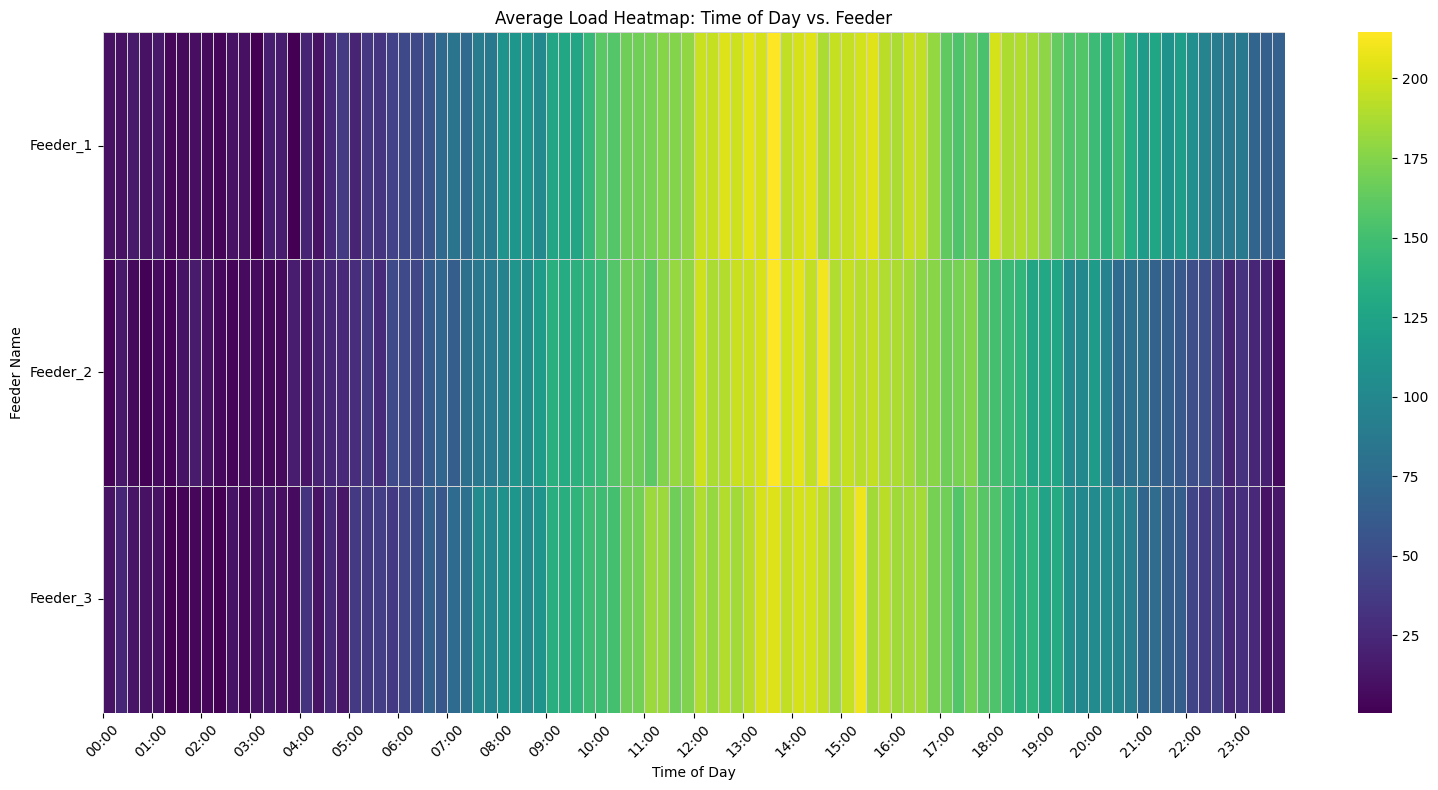

Heatmap generated.

2. Generating 24-hr Load Curves (Per Feeder and Total System)...


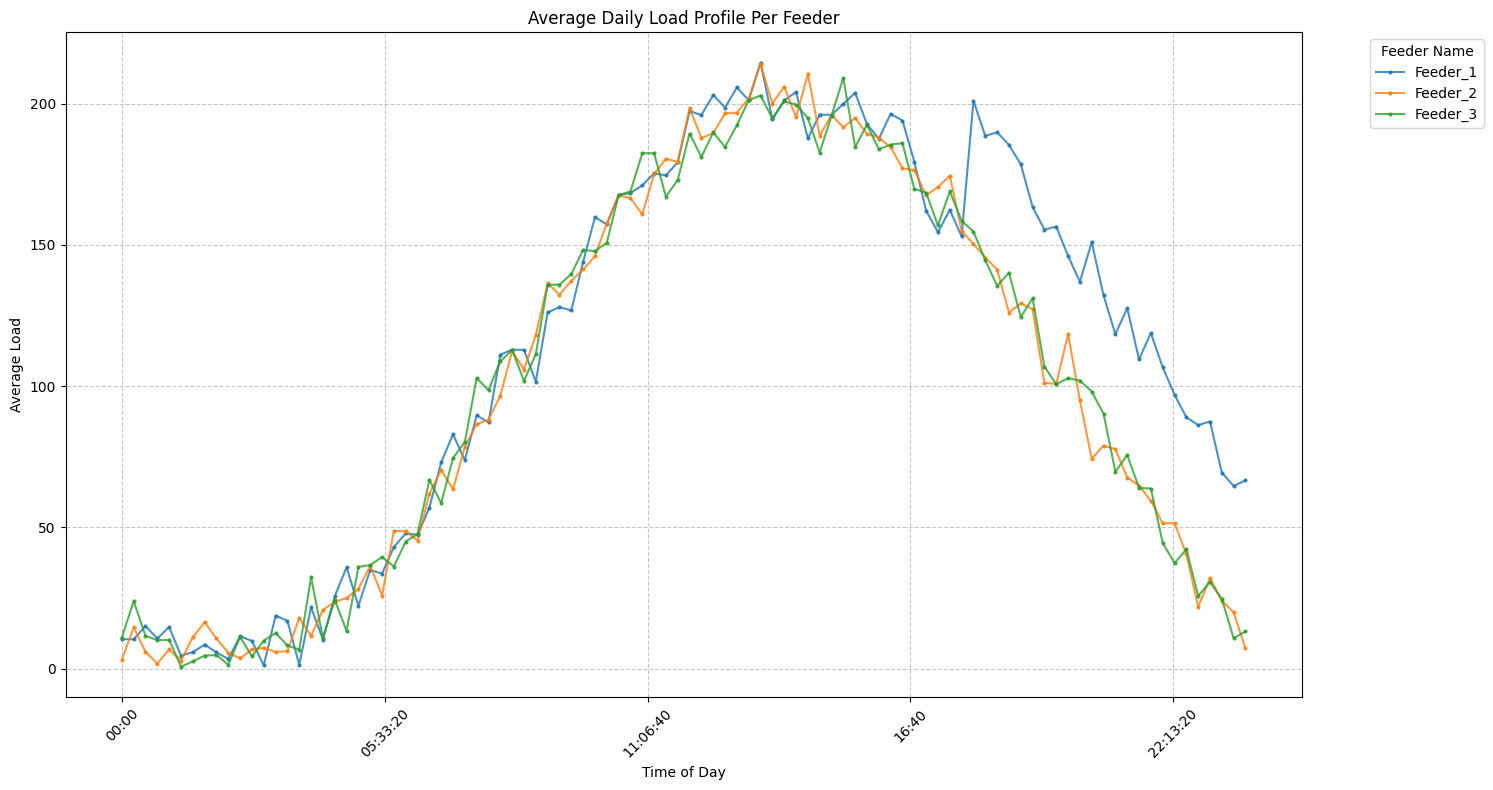

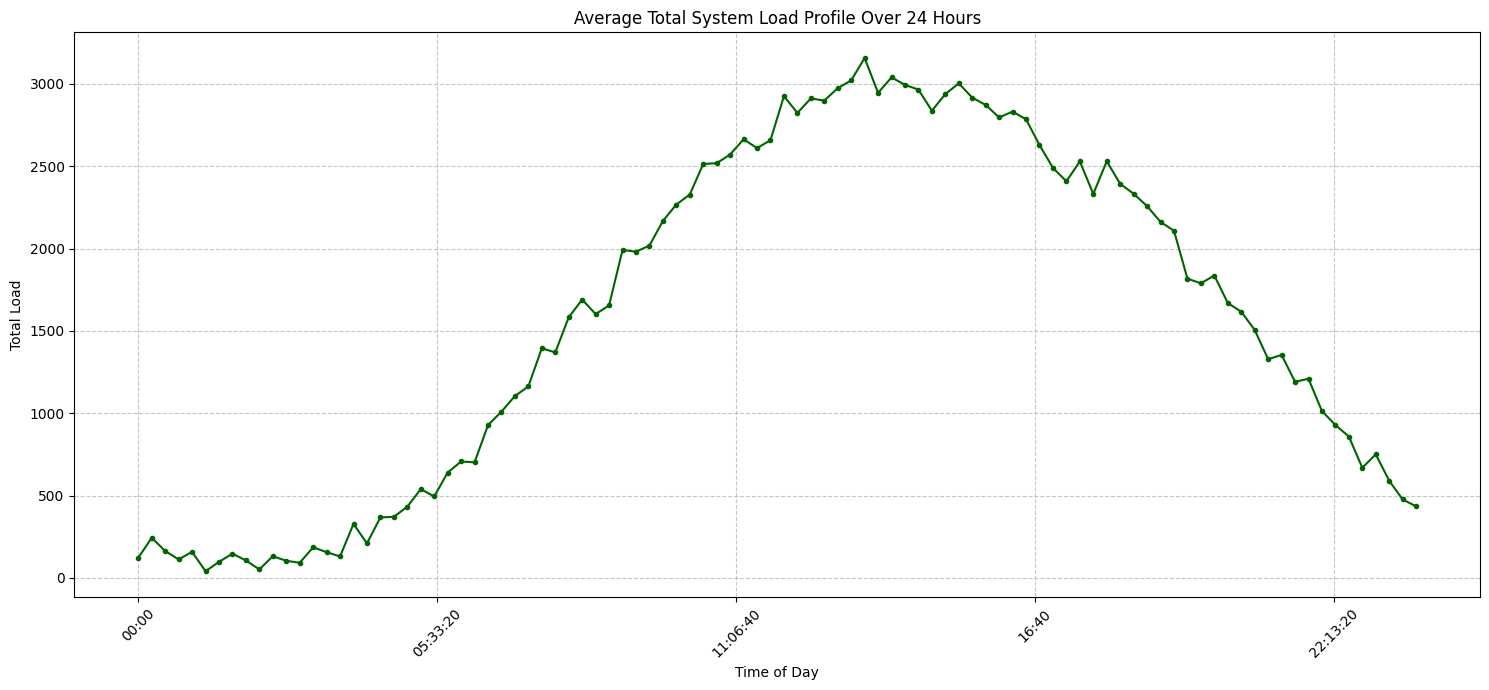

24-hr Load Curves generated.

3. Generating Bar Chart: Peak Load per Feeder...


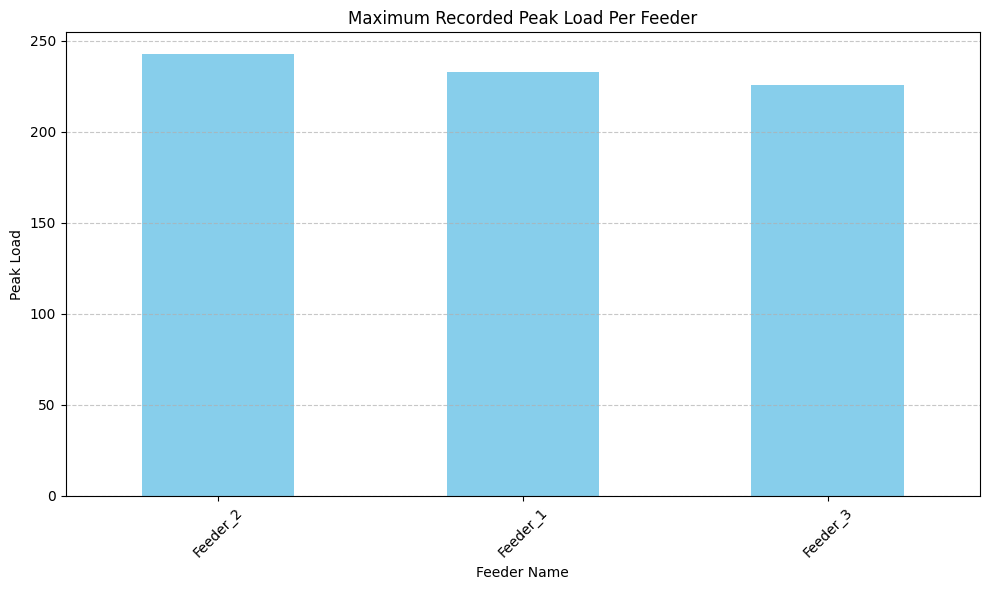

Bar chart of Peak Load per Feeder generated.

4. Generating Boxplot: Load Distribution per Feeder...


<ipython-input-73-c41f5fbbeb24>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feeder Name', y='Load', data=df_melted, palette='pastel')


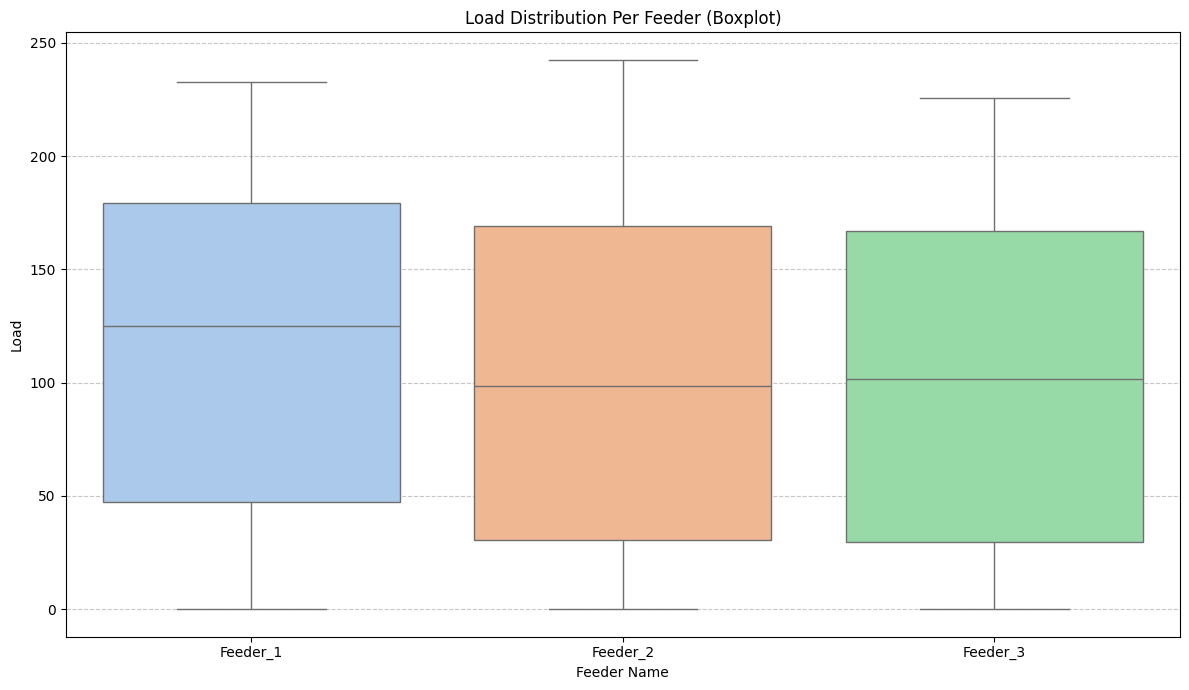

Boxplot of Load Distribution per Feeder generated.

--- All Visualizations Complete ---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is excellent for heatmaps and boxplots
import datetime

# Assuming df_melted is already created and cleaned from the previous steps.
# If you're running this code independently, ensure df_melted is defined.
# For demonstration purposes, I'll include a placeholder for df_melted if it's not defined.
try:
    df_melted
except NameError:
    print("df_melted not found. Please run the 'Load & Clean Data' step first to create it.")
    print("Creating a dummy df_melted for demonstration purposes. Replace with your actual data.")
    # --- Dummy df_melted for demonstration ---
    dates = pd.to_datetime(pd.date_range(start='2025-04-18', periods=5, freq='D'))
    feeder_names = ['Feeder_A', 'Feeder_B', 'Feeder_C']
    sample_rows = []
    for date in dates:
        for feeder_name in feeder_names:
            for hour in range(24):
                for minute in [0, 15, 30, 45]:
                    dt = date + pd.Timedelta(hours=hour, minutes=minute)
                    load_val = 100 + 50 * np.sin(np.pi * (hour + minute / 60 - 8) / 12) + np.random.normal(0, 5)
                    if feeder_name == 'Feeder_A' and (hour > 17 or hour < 6): load_val *= 1.5 # Higher night load for A
                    if feeder_name == 'Feeder_B' and (hour > 10 and hour < 14): load_val *= 1.8 # Higher midday load for B

                    sample_rows.append({
                        'DateTime': dt,
                        'Feeder Name': feeder_name,
                        'Load': max(0, load_val),
                        'Transformer Capacity': np.random.choice([1000, 1200, 1500]),
                        'No1': 50, 'No2': 30, 'No3': 20, 'No4': 10, 'No5': 5,
                        'Grid Name': 'Grid_X', 'DIV': 'Div_A', 'Feeder ID': 'FDR_ABC',
                        'Measurand': 'kWh', 'Peak Load': 0, 'Peak TIME': datetime.time(0,0)
                    })
    df_melted = pd.DataFrame(sample_rows).set_index('DateTime').sort_index()
    print("Dummy df_melted created for demonstration.")
    # End of Dummy df_melted

print("\n--- Visualizations ---")

# --- Prepare data for plotting ---
# Calculate average daily load profile for each feeder
# This will be used for the heatmap and the 24-hr load curve line plot
avg_daily_profile_per_feeder = df_melted.groupby([df_melted.index.time, 'Feeder Name'])['Load'].mean().unstack(level='Feeder Name')

# Calculate total system load curve (average across days for each time interval)
total_system_load_curve = df_melted.groupby(df_melted.index.time)['Load'].sum()

# Calculate feeder statistics for bar chart (Peak Load)
feeder_peak_loads = df_melted.groupby('Feeder Name')['Load'].max()


# --- 1. Heatmap of load (Time vs Feeder) ---
print("\n1. Generating Heatmap of Load (Time vs Feeder)...")

plt.figure(figsize=(16, 8))
sns.heatmap(avg_daily_profile_per_feeder.T, cmap='viridis', annot=False, fmt=".0f", linewidths=.5, linecolor='lightgray')
plt.title('Average Load Heatmap: Time of Day vs. Feeder')
plt.xlabel('Time of Day')
plt.ylabel('Feeder Name')
plt.xticks(np.arange(0, 96, 4), [f"{h:02d}:00" for h in range(24)], rotation=45) # Label every hour
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Heatmap generated.")


# --- 2. Line plot: 24-hr load curve (per feeder or system) ---
print("\n2. Generating 24-hr Load Curves (Per Feeder and Total System)...")

# Plot per feeder on one graph
plt.figure(figsize=(15, 8))
avg_daily_profile_per_feeder.plot(kind='line', marker='.', markersize=4, alpha=0.8, ax=plt.gca())
plt.title('Average Daily Load Profile Per Feeder')
plt.xlabel('Time of Day')
plt.ylabel('Average Load')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='Feeder Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot total system load curve (already calculated)
plt.figure(figsize=(15, 7))
total_system_load_curve.plot(kind='line', marker='o', markersize=3, color='darkgreen')
plt.title('Average Total System Load Profile Over 24 Hours')
plt.xlabel('Time of Day')
plt.ylabel('Total Load')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("24-hr Load Curves generated.")


# --- 3. Bar chart: Peak Load per feeder ---
print("\n3. Generating Bar Chart: Peak Load per Feeder...")

plt.figure(figsize=(10, 6))
feeder_peak_loads.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Maximum Recorded Peak Load Per Feeder')
plt.xlabel('Feeder Name')
plt.ylabel('Peak Load')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Bar chart of Peak Load per Feeder generated.")


# --- 4. Boxplot: Load distribution per feeder ---
print("\n4. Generating Boxplot: Load Distribution per Feeder...")

plt.figure(figsize=(12, 7))
sns.boxplot(x='Feeder Name', y='Load', data=df_melted, palette='pastel')
plt.title('Load Distribution Per Feeder (Boxplot)')
plt.xlabel('Feeder Name')
plt.ylabel('Load')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Boxplot of Load Distribution per Feeder generated.")

print("\n--- All Visualizations Complete ---")